In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [8]:
df.drop('id',inplace=True,axis = 1)

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We herein report a fatal case of super-super obesity (BMI >80) complicated by a necrotic soft tissue infection.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [47]:
for i in df.columns:
    if df[i].name == 'age' :
        continue
    elif df[i].name == 'avg_glucose_level':
        continue
    elif df[i].name == 'bmi':
        continue
    print(df[i].name.capitalize())
    print(df[i].value_counts())
    print('-------------------------')

Gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-------------------------
Hypertension
0    4612
1     498
Name: hypertension, dtype: int64
-------------------------
Heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
-------------------------
Ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
-------------------------
Work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-------------------------
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-------------------------
Smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
-------------------------
Stroke
0    4861
1     249
Name: stroke, dtype: int64
-------------------------


## The dataset can be assumed as imbalanced dataset but in case of heart diseases (stroke) it is usually observed at later ages of life (From 50's).

Smoking relates more towards lung cancer and blood oxygen related deficiencies, also data shows that people who never smoked also suffered stroke.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

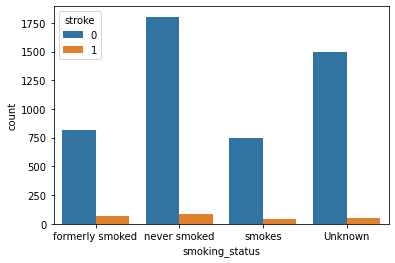

In [49]:
sns.countplot(data=df,x=df.smoking_status,hue = df.stroke)

People aged > 50 are most likely to be victim of heart stroke

<AxesSubplot:xlabel='age', ylabel='Count'>

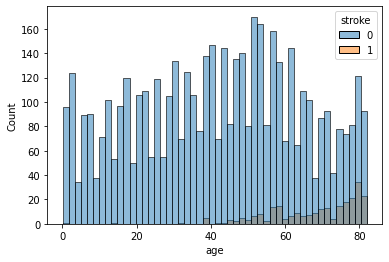

In [58]:
sns.histplot(data=df, x = df.age, hue = df.stroke,bins = 50)

Below Boxplot makes it more clear

<AxesSubplot:xlabel='stroke', ylabel='age'>

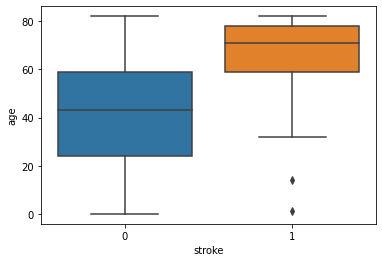

In [65]:
sns.boxplot(data = df, y = df.age ,x = df.stroke)

* The above box plot shows data of people suffered stroke below age 20, let's check for other details.

In [81]:
df[df.age < 20][ df.stroke == 1]

<ipython-input-81-f6154e0c3d55>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.age < 20][ df.stroke == 1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


## Here
1. For 1st record we have NaN value for BMI.
2. But for second record we can observe that the female child had obesity as BMI > 30 is Obese.

## Assumptions:
The particular child could be obese but considering age we can consider it may be an outlier.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

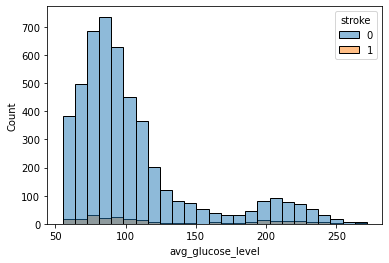

In [96]:
sns.histplot(data = df, x = df.avg_glucose_level, hue = df.stroke,bins = 25)

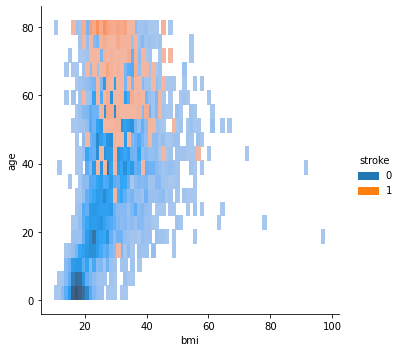

In [101]:
sns.displot(data = df, y = df.age, x = df.bmi,hue = df.stroke)


## Hence even people having average BMI suffered strokes due to factor of age.

# We will store features that are less related to diseases but more towards sentiments

In [98]:
df_sentiments = pd.DataFrame(data=df,columns = ['hypertension', 'ever_married', 'work_type', 'Residence_type'])

In [83]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [105]:
df_sentiments.head()

,hypertension,ever_married,work_type,Residence_type
0,0,Yes,Private,Urban
1,0,Yes,Self-employed,Rural
2,0,Yes,Private,Rural
3,0,Yes,Private,Urban
4,1,Yes,Self-employed,Rural


In [104]:
for i in df_sentiments.columns:
    print(df_sentiments[i].name.capitalize())
    print(df_sentiments[i].value_counts())
    print('-------------------------')

Hypertension
0    4612
1     498
Name: hypertension, dtype: int64
-------------------------
Ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
-------------------------
Work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-------------------------
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-------------------------


<AxesSubplot:xlabel='work_type', ylabel='count'>

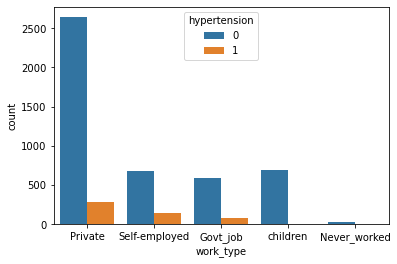

In [148]:
sns.countplot(data = df_sentiments, x = 'work_type', hue = df.hypertension)

<AxesSubplot:xlabel='work_type', ylabel='count'>

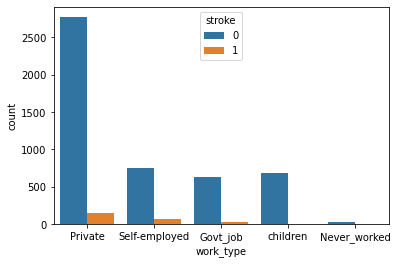

In [139]:
sns.countplot(data = df_sentiments, x = 'work_type', hue = df.stroke)

In [147]:
df[df.work_type == 'children' ][ df.work_type == 'Never_worked'][ df.stroke == 1]

<ipython-input-147-f38bf4789705>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.work_type == 'children' ][ df.work_type == 'Never_worked'][ df.stroke == 1]
<ipython-input-147-f38bf4789705>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.work_type == 'children' ][ df.work_type == 'Never_worked'][ df.stroke == 1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# CONCLUSION : The Working professionals are prone to be suffering from hypertension and can be a reason to be prone to heart strokes too.
 
 ## Also the young age children or non-working persons tend to have lower stress levels and the reason they are less prone to strokes. 

In [169]:
df1 = df
df1.dropna(inplace=True)

In [170]:
X = df1.drop('stroke',axis = 1)
y = df1['stroke']

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logr = LogisticRegression()

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [192]:
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop = 'first'),
                                        [0,4,5,6,9])],remainder='passthrough')

step2 = LogisticRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Classification Report: ', classification_report(y_test,y_pred))
print('ConfusionMatrix: ', confusion_matrix(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.95      1.00      0.98       936
           1       0.00      0.00      0.00        46

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982

ConfusionMatrix:  [[936   0]
 [ 46   0]]


C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
rfc = RandomForestClassifier()

In [202]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop = 'first'),
                                        [0,4,5,6,9])],remainder='passthrough')

step2 = rfc

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('Classification Report: ', classification_report(y_test,y_pred))
print('ConfusionMatrix: ', confusion_matrix(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.95      1.00      0.98       936
           1       0.50      0.02      0.04        46

    accuracy                           0.95       982
   macro avg       0.73      0.51      0.51       982
weighted avg       0.93      0.95      0.93       982

ConfusionMatrix:  [[935   1]
 [ 45   1]]


In [205]:
X_test_trans = X_test.iloc[0]

In [206]:
(X_test_trans)

gender                       Male
age                            13
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                 Private
Residence_type              Rural
avg_glucose_level            90.6
bmi                          16.9
smoking_status       never smoked
Name: 3334, dtype: object